In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("../Support Vector Machine/IRIS.csv")

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [7]:
df["species"] = df["species"].replace("Iris-setosa",0)
df["species"] = df["species"].replace("Iris-versicolor",1)
df["species"] = df["species"].replace("Iris-virginica",2)

In [8]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [12]:
df[df.species==0].shape

(50, 5)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
df.shape

(147, 5)

# Visualization

In [35]:
class_0 = df[df["species"]==0]
class_1 = df[df["species"]==1]
class_2 = df[df["species"]==2]

In [36]:
class_2.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2


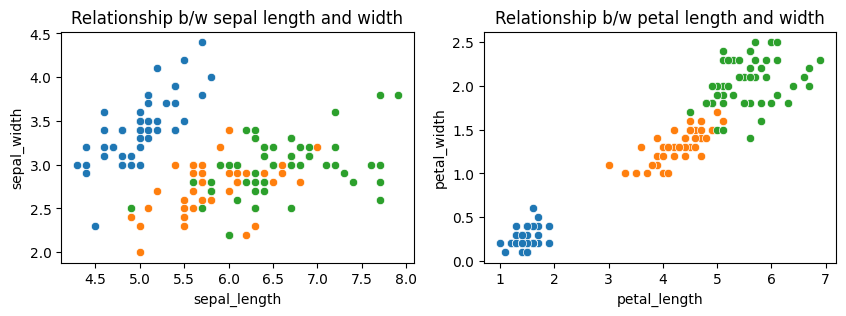

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

sns.scatterplot(x=class_0["sepal_length"], y=class_0["sepal_width"], ax=ax1)
sns.scatterplot(x=class_1["sepal_length"], y=class_1["sepal_width"], ax=ax1)
sns.scatterplot(x=class_2["sepal_length"], y=class_2["sepal_width"], ax=ax1)
ax1.set_title("Relationship b/w sepal length and width")

sns.scatterplot(x=class_0["petal_length"], y=class_0["petal_width"], ax=ax2)
sns.scatterplot(x=class_1["petal_length"], y=class_1["petal_width"], ax=ax2)
sns.scatterplot(x=class_2["petal_length"], y=class_2["petal_width"], ax=ax2)
ax2.set_title("Relationship b/w petal length and width")

plt.show()


# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x = df.drop("species", axis=1)
y = df["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=12)

In [40]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
140,6.7,3.1,5.6,2.4
11,4.8,3.4,1.6,0.2
17,5.1,3.5,1.4,0.3
131,7.9,3.8,6.4,2.0
...,...,...,...,...
78,6.0,2.9,4.5,1.5
3,4.6,3.1,1.5,0.2
132,6.4,2.8,5.6,2.2
136,6.3,3.4,5.6,2.4


In [41]:
y_train

41     0
140    2
11     0
17     0
131    2
      ..
78     1
3      0
132    2
136    2
77     1
Name: species, Length: 124, dtype: int64

In [43]:
len(x_train)

124

In [44]:
len(x_test)

23

# Building KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knc = KNeighborsClassifier(n_neighbors=5)

In [75]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
pred = knc.predict(x_test)

In [77]:
accuracy_score(pred, y_test)

1.0

In [82]:
# select best value of K fro best accuracy score
for i in range(1,50):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train, y_train)
    pred = knc.predict(x_test)
    print(f"Accuracy Score {i} : {accuracy_score(pred, y_test)}")

Accuracy Score 1 : 1.0
Accuracy Score 2 : 1.0
Accuracy Score 3 : 1.0
Accuracy Score 4 : 0.9565217391304348
Accuracy Score 5 : 1.0
Accuracy Score 6 : 1.0
Accuracy Score 7 : 1.0
Accuracy Score 8 : 1.0
Accuracy Score 9 : 1.0
Accuracy Score 10 : 1.0
Accuracy Score 11 : 1.0
Accuracy Score 12 : 1.0
Accuracy Score 13 : 1.0
Accuracy Score 14 : 1.0
Accuracy Score 15 : 1.0
Accuracy Score 16 : 1.0
Accuracy Score 17 : 1.0
Accuracy Score 18 : 0.9565217391304348
Accuracy Score 19 : 1.0
Accuracy Score 20 : 1.0
Accuracy Score 21 : 1.0
Accuracy Score 22 : 0.9565217391304348
Accuracy Score 23 : 1.0
Accuracy Score 24 : 0.9565217391304348
Accuracy Score 25 : 1.0
Accuracy Score 26 : 1.0
Accuracy Score 27 : 1.0
Accuracy Score 28 : 1.0
Accuracy Score 29 : 1.0
Accuracy Score 30 : 1.0
Accuracy Score 31 : 1.0
Accuracy Score 32 : 0.9565217391304348
Accuracy Score 33 : 1.0
Accuracy Score 34 : 1.0
Accuracy Score 35 : 1.0
Accuracy Score 36 : 1.0
Accuracy Score 37 : 1.0
Accuracy Score 38 : 0.9565217391304348
Accurac

# Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[7, 0, 0],
       [0, 8, 0],
       [0, 1, 7]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

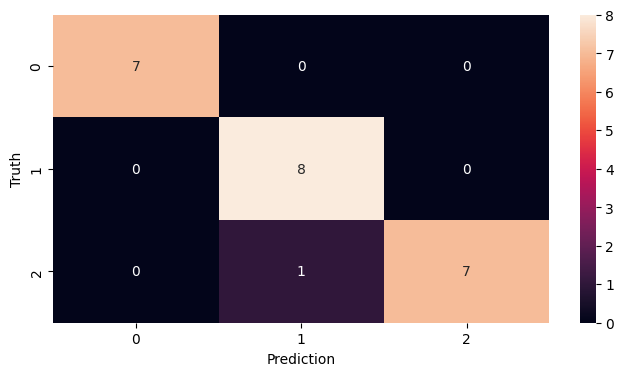

In [86]:
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

# Classification Report

In [87]:
from sklearn.metrics import classification_report

print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.89      0.94         9
           2       0.88      1.00      0.93         7

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23

